**Análisis de Datos**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
from glob import glob

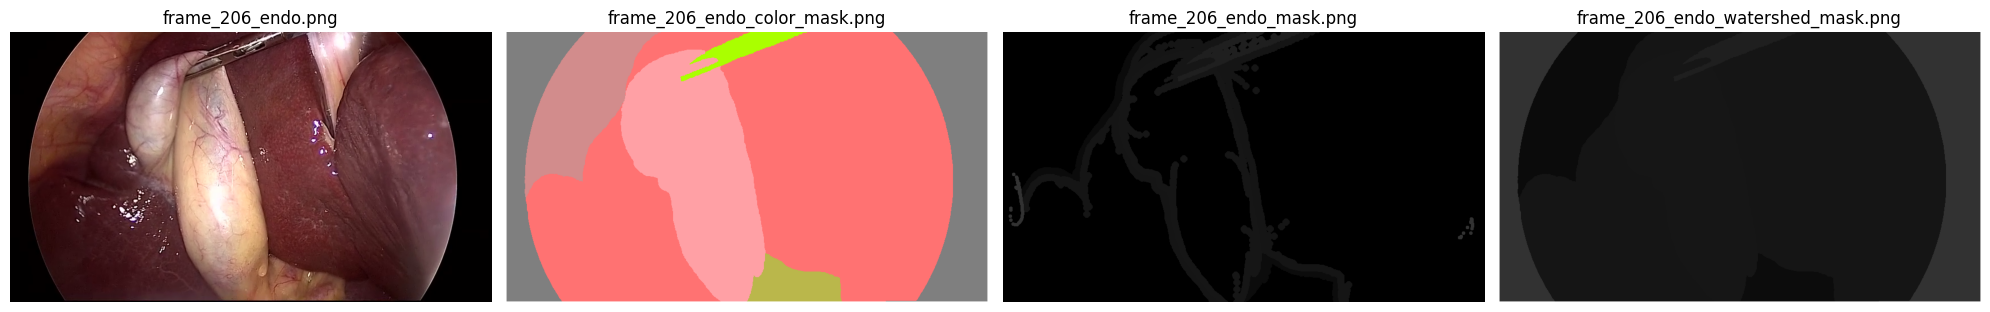

In [2]:
imgs = []
imgIdx = random.randint(160, 239)
paths = glob(f'../*/video01/video01_00160/frame_{imgIdx}*')
for sample in paths:
    img = cv2.imread(sample)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imgs.append(img)
imgs = np.array(imgs)

plt.figure(figsize=(20,20))
for i in range(imgs.shape[0]):
    plt.subplot(141 + i)
    plt.imshow(imgs[i])
    plt.title(paths[i].split('\\')[-1])
    plt.axis("off")
plt.tight_layout()
plt.show()


##### Analizamos las máscaras

In [3]:
imgs.shape

(4, 480, 854, 3)

In [4]:

print('Valores únicos')

# Calcular la cantidad de valores únicos en la máscara de color y mostrarla
color_mask_unique = len(np.unique(imgs[1].reshape(-1, 3), axis=0))
print(f'Valores únicos en la máscara de color: {color_mask_unique}')

# Calcular la cantidad de valores únicos en la máscara de segmentación Watershed y mostrarla
watershed_mask_unique = len(np.unique(imgs[3].reshape(-1, 3), axis=0))
print(f'Valores únicos en la máscara de segmentación Watershed: {watershed_mask_unique}')

# Mensaje para mostrar los valores
print('Valores')

# Mostrar los valores únicos de la máscara de color
color_mask_values = np.unique(imgs[1].reshape(-1, 3), axis=0)
print(f'Valores en la máscara de color:\n{color_mask_values}')

# Mostrar los valores únicos de la máscara de segmentación Watershed
watershed_mask_values = np.unique(imgs[3].reshape(-1, 3), axis=0)
print(f'Valores en la máscara de segmentación Watershed:\n{watershed_mask_values}')


Valores únicos
Valores únicos en la máscara de color: 7
Valores únicos en la máscara de segmentación Watershed: 7
Valores
Valores en la máscara de color:
[[127 127 127]
 [170 255   0]
 [186 183  75]
 [210 140 140]
 [255 114 114]
 [255 160 165]
 [255 255 255]]
Valores en la máscara de segmentación Watershed:
[[ 11  11  11]
 [ 12  12  12]
 [ 21  21  21]
 [ 22  22  22]
 [ 31  31  31]
 [ 50  50  50]
 [255 255 255]]


Podemos observar que las máscaras de color y segmentación Watershed muestran 7 valores únicos cada una, que podrían representar colores y regiones distintas en la imagen.

##### Procesamiento de máscara

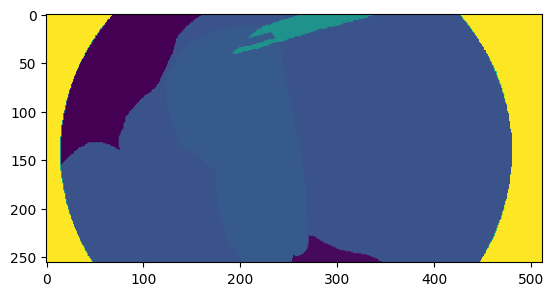

In [5]:
# Definir dimensiones
HEIGHT, WIDTH = 256, 512

# Encontrar y cargar la máscara desde los archivos
mask_path = glob(f'../*/video01/video01_00160/frame_169_endo_watershed_mask.png')[0]
mask = cv2.imread(mask_path)

# Ajustar la máscara: recortar bordes y cambiar a escala de grises
mask = mask[20:-20, 10:-10, :]
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

# Redimensionar la máscara a las dimensiones definidas
mask = cv2.resize(mask, (WIDTH, HEIGHT), interpolation=cv2.INTER_NEAREST)
mask = np.expand_dims(mask, axis=-1)

# Mostrar la máscara procesada
plt.imshow(mask)
plt.show()


In [6]:
np.unique(mask)

array([11, 12, 21, 22, 31, 50], dtype=uint8)

Basándonos en los valores únicos presentes en la máscara procesada:

La máscara ha sido segmentada en diferentes regiones identificadas por los valores [11, 12, 21, 22, 31, 50]. Cada valor único corresponde a una región específica en la imagen.
La ausencia del valor 255 en la lista de valores únicos nos indica que este valor se reserva para algún propósito especial, como representar áreas no segmentadas, fondo o bordes.
El proceso de ajuste, conversión a escala de grises, redimensionamiento y análisis de valores únicos ha sido efectivo para identificar y representar las regiones en la máscara de segmentación.

--
**TFG - Adrián Contreras Castillo**
--